In [1]:
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.2 MB/s eta 0:00:00


In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

In [4]:
!unzip 'task.zip'

Archive:  task.zip
  inflating: Fake.csv                
  inflating: True.csv                


Load dataset

In [5]:
fake_data=pd.read_csv("Fake.csv")
real_data=pd.read_csv("True.csv")

Data Analysis

In [6]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


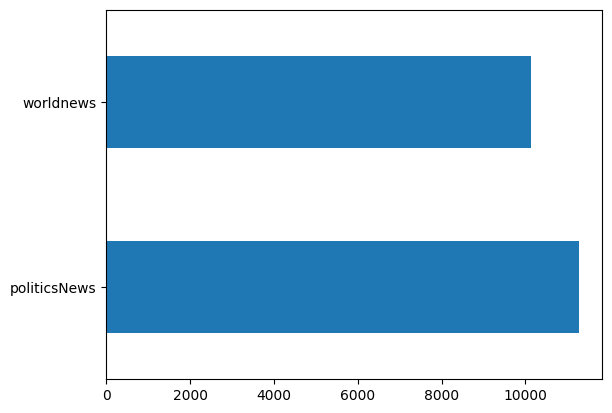

In [8]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5


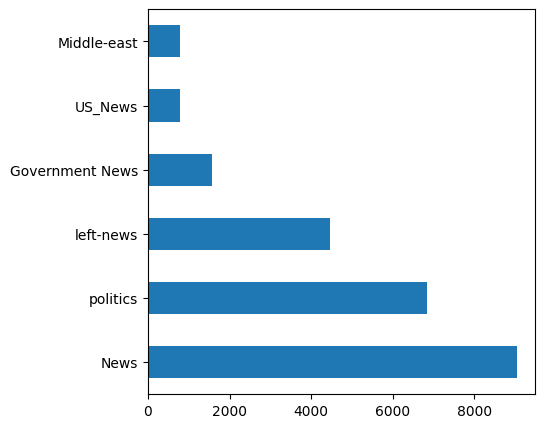

In [9]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

wordcloud real text data

In [10]:
# wordcld_mask=np.array(Image.open("../input/wodcloud-twiter-pic/twitter.png"))

In [11]:
# wordcld_text=" ".join(real_data["text"].tolist())

In [12]:
# wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
# fig=plt.figure(figsize=(8,8))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

wordcloud fake text data

In [13]:
# fake_text=" ".join(fake_data["text"].tolist())

In [14]:
# wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
# fig=plt.figure(figsize=(8,8))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

In [15]:
fake_data["label"]="fake"
real_data["label"]="real"

In [16]:
final_data= pd.concat([fake_data,real_data])

In [17]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [18]:
final_data.head(10)

,title,text,subject,date,label
0,VIDEO: CROWD Chants “LOCK HER UP!” As Crooked ...,Boos and chants of Lock her up! were heard i...,politics,"Jan 20, 2017",fake
1,"Driven by fear, Rohingyas keep fleeing Myanmar...","SITTWE, Myanmar (Reuters) - The thousands of R...",worldnews,"October 26, 2017",real
2,House intelligence panel chair: Probe of Russi...,WASHINGTON (Reuters) - House Intelligence Comm...,politicsNews,"March 28, 2017",real
3,Indian tycoon's extradition hearing told of ab...,LONDON (Reuters) - One of the Chennai Six gr...,worldnews,"December 14, 2017",real
4,Louisiana Cop Claims Murdering A 6-Year Old C...,A Louisiana deputy city marshal is in hot wate...,News,"September 23, 2016",fake
5,Trump says he respects CIA in his first visit ...,"LANGLEY, Va. (Reuters) - U.S. President Donald...",politicsNews,"January 21, 2017",real
6,"Saudi king heads to Russia, with oil, investme...",RIYADH/MOSCOW (Reuters) - The leaders of Saudi...,worldnews,"October 3, 2017",real
7,This Homeless Veteran Receives A Gift From A ...,Most of us don t know what it s like to be hom...,News,"January 10, 2016",fake
8,TRUMP PRESS SECRETARY Calls Out CNN’S CAMEROTA...,Wow! This interview is hysterical! Sean Spicer...,politics,"Jan 6, 2017",fake
9,Senator McCain says subpoena may be required t...,"WASHINGTON (Reuters) - Senator John McCain, ch...",politicsNews,"October 19, 2017",real


In [19]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [20]:
final_data.drop(["subject","date"], axis=1)

,title,text,label
0,VIDEO: CROWD Chants “LOCK HER UP!” As Crooked ...,Boos and chants of Lock her up! were heard i...,fake
1,"Driven by fear, Rohingyas keep fleeing Myanmar...","SITTWE, Myanmar (Reuters) - The thousands of R...",real
2,House intelligence panel chair: Probe of Russi...,WASHINGTON (Reuters) - House Intelligence Comm...,real
3,Indian tycoon's extradition hearing told of ab...,LONDON (Reuters) - One of the Chennai Six gr...,real
4,Louisiana Cop Claims Murdering A 6-Year Old C...,A Louisiana deputy city marshal is in hot wate...,fake
...,...,...,...
44893,Sanders raises more cash but Clinton makes cam...,WASHINGTON/NEW YORK - Democratic presidential ...,real
44894,"Trump cyber security team, policy slow to take...",WASHINGTON (Reuters) - President-elect Donald ...,real
44895,TOM HANKS TO JOIN Hollywood Liberals In Facebo...,"Tom Hanks, Tina Fey, Alec Baldwin and Amy Poeh...",fake
44896,BOOM! This Is How President Reagan Handled Pro...,Ronald Reagan shut down the Berkeley protests ...,fake


In [21]:
final_data.head()

,title,text,subject,date,label
0,VIDEO: CROWD Chants “LOCK HER UP!” As Crooked ...,Boos and chants of Lock her up! were heard i...,politics,"Jan 20, 2017",fake
1,"Driven by fear, Rohingyas keep fleeing Myanmar...","SITTWE, Myanmar (Reuters) - The thousands of R...",worldnews,"October 26, 2017",real
2,House intelligence panel chair: Probe of Russi...,WASHINGTON (Reuters) - House Intelligence Comm...,politicsNews,"March 28, 2017",real
3,Indian tycoon's extradition hearing told of ab...,LONDON (Reuters) - One of the Chennai Six gr...,worldnews,"December 14, 2017",real
4,Louisiana Cop Claims Murdering A 6-Year Old C...,A Louisiana deputy city marshal is in hot wate...,News,"September 23, 2016",fake


In [22]:
final_data.label.value_counts()

fake    23481
real    21417
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

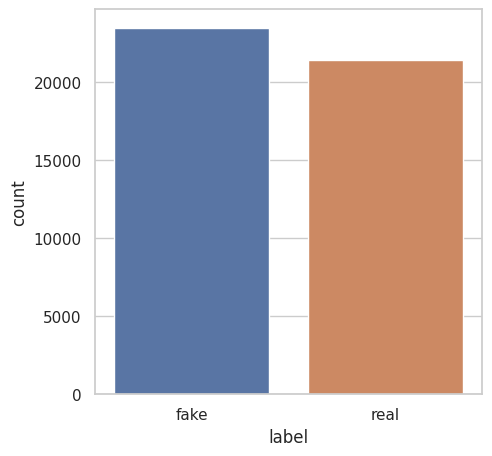

In [23]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [24]:
final_data.head(5)

,title,text,subject,date,label
0,VIDEO: CROWD Chants “LOCK HER UP!” As Crooked ...,Boos and chants of Lock her up! were heard i...,politics,"Jan 20, 2017",fake
1,"Driven by fear, Rohingyas keep fleeing Myanmar...","SITTWE, Myanmar (Reuters) - The thousands of R...",worldnews,"October 26, 2017",real
2,House intelligence panel chair: Probe of Russi...,WASHINGTON (Reuters) - House Intelligence Comm...,politicsNews,"March 28, 2017",real
3,Indian tycoon's extradition hearing told of ab...,LONDON (Reuters) - One of the Chennai Six gr...,worldnews,"December 14, 2017",real
4,Louisiana Cop Claims Murdering A 6-Year Old C...,A Louisiana deputy city marshal is in hot wate...,News,"September 23, 2016",fake


In [25]:
final_data["text"]=final_data["title"]+final_data["text"]

In [26]:
final_data=final_data[["text","label"]]

In [27]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

<ipython-input-27-8070d13510ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['label'] = final_data['label'].map({'real':1, 'fake':0})


In [28]:
final_data.sample(5)

,text,label
2376,WATCH: Utah Republican Leaves GOP After Disap...,0
27686,Syrian government forces used chemical weapons...,1
42864,"Trump vaunts trade progress, red carpets on 'f...",1
2881,House Speaker Ryan says Trump comments about H...,1
11799,U.N. to assess if either side trying to 'sabot...,1


In [29]:
final_data.label[9943]

0

In [30]:
final_data.text[36709]

'HILLARY SUPPORTER SAYS MURDERS WILL HAPPEN At Anti-Trump Riots: “There Will Be Casualties On Both Sides….People Have To Die To Make A Change…” [VIDEO]Keep in mind, a group funded by one of Hillary and Barack Obama s largest campaign contributors globalist, George Soros is advertising to pay people to attend these violent rallies.https://youtu.be/Td4-UeLqikc'

In [31]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]


In [32]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


In [33]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [34]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [36]:
def tokenize(X):

    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [ ]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [ ]:
maxlen=100

create bert model

In [ ]:
from tensorflow.keras.models import Model
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model



In [ ]:
model=create_model()
model.summary()

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule, epsilon=1e-08,clipnorm=1.0)

In [ ]:
# optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [ ]:
history = model.fit(x = {'input_1':X_train_token['input_ids'],'input_2':X_train_token['attention_mask']}, y = Y_train, epochs=10, validation_split = 0.2, batch_size = 30, callbacks=[callback])

In [ ]:
# import tensorflow as tf
# import tensorflow_hub as hub
# import tensorflow_text as text

# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

# # Bert layers
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
# preprocessed_text = bert_preprocess(text_input)
# outputs = bert_encoder(preprocessed_text)

# # Neural network layers
# l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# # Use inputs and outputs to construct a final model
# model = tf.keras.Model(inputs=[text_input], outputs = [l])
# model.summary()


In [ ]:
# METRICS = [
#       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision'),
#       tf.keras.metrics.Recall(name='recall')
# ]

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=METRICS)
# model.fit(X_train, y_train, epochs=10)

In [ ]:
model.save('bert-model')

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
y_pred = np.where(model.predict({ 'input_1' : X_test_token['input_ids'] , 'input_2' : X_test_token['attention_mask']}) >=0.5,1,0)

Confusion matrix

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred))

Custom data prediction

In [ ]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"

In [ ]:
test_token = tokenize(test_text)

In [ ]:
test_text_pred = np.where(model.predict({ 'input_1' : test_token['input_ids'] , 'input_2' : test_token['attention_mask']}) >=0.5,1,0)

In [ ]:
test_text_pred

In [ ]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")